In [1]:
import numpy as np
import torch
from sklearn import datasets
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
# Criar um modelo de Rede Neural
class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Net, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size) #full connected
    self.relu = torch.nn.ReLU() #(0, infinito)
    self.fc2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid() #(0, 1)
  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output)
    return output

In [4]:
# Base de dados
iris = datasets.load_iris()
dados = iris.data
classes = iris.target # 0 setosa, 1 versicolor, 2 virginica
nomeClasses = iris.target_names 

In [5]:
# Preparação dos dados - Conversão da classe
saida = np.where(classes==0, 1, 0) #setosa

In [6]:
# Convertendo para tensor
entrada = torch.FloatTensor(dados) / 10 # normalizando os valores
saida = torch.FloatTensor(saida)

In [7]:
# Embaralhar os dados
entrada, saida = shuffle(entrada, saida)

In [8]:
# Separar os dados em treinamento e testes
entrada_treinamento = entrada[0:120, :]
saida_treinamento = saida[0:120]
entrada_testes = entrada[120:150, :]
saida_testes = saida[120:150]

In [9]:
# Montar o modelo para o treinamento
input_size = entrada_treinamento.size()[1]
hidden_size = 5
modelo = Net(input_size, hidden_size)

# Configurações do modelo
# criterion = torch.nn.BCELoss() # Binary Cross Entropy
criterion = torch.nn.MSELoss() # Mean Square Error
optimizer = torch.optim.SGD(modelo.parameters(), lr = 0.5, momentum = 0.3) 

In [10]:
# Treinar o modelo

epochs = 10001 
errors = [] 

for epoch in range(epochs):
  optimizer.zero_grad()
  # Forward pass
  y_pred = modelo(entrada_treinamento)
  # Compute Loss
  loss = criterion(y_pred.squeeze(), saida_treinamento)
  errors.append(loss.item())
  if epoch % 1000 == 0:
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
  # Backpropagation
  loss.backward()
  optimizer.step()

Epoch 0: train loss: 0.23755960166454315
Epoch 1000: train loss: 0.001028632977977395
Epoch 2000: train loss: 0.0004457952454686165
Epoch 3000: train loss: 0.00027506781043484807
Epoch 4000: train loss: 0.00019559008069336414
Epoch 5000: train loss: 0.00015028045163489878
Epoch 6000: train loss: 0.00012123880151193589
Epoch 7000: train loss: 0.00010115176701219752
Epoch 8000: train loss: 8.649777737446129e-05
Epoch 9000: train loss: 7.536628254456446e-05
Epoch 10000: train loss: 6.664697866654024e-05


In [11]:
# Rodar testes
y_pred = modelo(entrada_testes)
# print(y_pred) # valor previsto pela rede
# print(saida_testes) # valor real

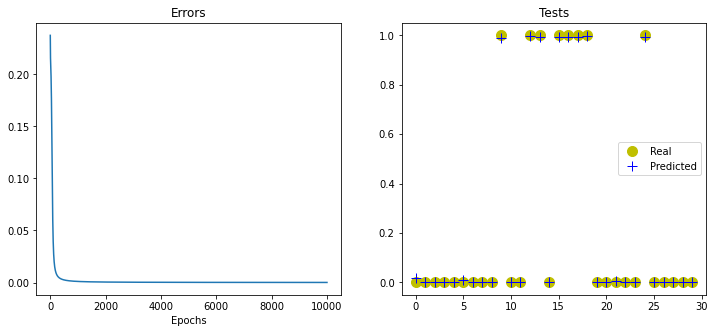

In [12]:
# Gerar gráfico de erro e resultado de classificação
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(saida_testes.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)